# Data Manipulation

In [1]:
# Import Libraries For Data Munging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import mode

%matplotlib inline

In [2]:
# Read the csv file into a dataframe
data = pd.read_csv("Data/train.csv")

In [3]:
# Preview data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Check for missing values
print "Info about our dataframe"
data.info()
print "-------------------------------------------------------"
print data.apply(lambda x: x.isnull().sum() ,axis = 0), "\n"

# This seems like a unique idenitifier so we should count how many values there are to the dataset.
print "Total Number of Rows:", sum(data['Loan_ID'].value_counts())

Info about our dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
-------------------------------------------------------
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22

# 1) Dropping Columns and Visualization

In [5]:
"""
There might be columns we don't need. Deleting them would help clean the data.

Asuming one doesn't get rejected from a loan based on an arbitrary numbering system, self-employment, and dependents.
It really just comes down to the money you can pay back with for Self Employed class I believe.
"""

data = data.drop(['Loan_ID','Self_Employed','Dependents'],axis = 1)

Let's just look at the rest of the data and make observations.

Things that could be used to get the following missing information
1. Married: Mode of Married
1. Gender: (ApplicantIncome + CopplicantIncome)
3. LoanAmount: Loan_Status (Indicator) -> Property_Area, (ApplicantIncome + CopplicantIncome)
4. Loan_Amount_Term: LoanAmount

There could be more, but they might be insignificant to determining.


In [6]:
"""
1. Married
"""
print "Number of Null Values in Married: ", data['Married'].isnull().sum()
print "-----Since it's just 3 missing values, it wouldn't affect the data too much if we replaced by the mode.-----"
print "Married"
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
print data['Married'].value_counts()
print "Number of Null Values in Married: ", data['Married'].isnull().sum()

Number of Null Values in Married:  3
-----Since it's just 3 missing values, it wouldn't affect the data too much if we replaced by the mode.-----
Married
Yes    401
No     213
Name: Married, dtype: int64
Number of Null Values in Married:  0


Number of Male and Female Applicants
Male      489
Female    112
Name: Gender, dtype: int64
---------------------------------------
Average Combined Income:
Males: 7189.39 +- 6448.47
Females: 5751.48 +- 4879.45


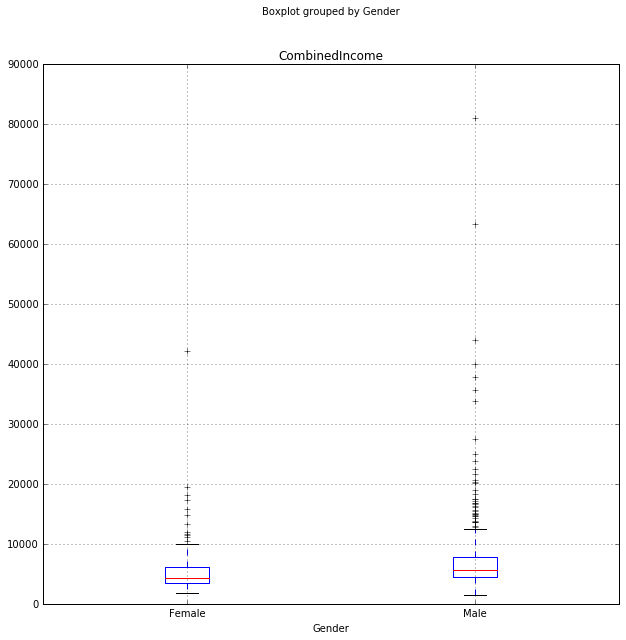


---It seemed the data has extreme values. Lets log the data for a perhaps better distribution.



In [10]:
"""
2. Gender
"""

# NOTE: since it's only 13 missing values we could easily input the mode as well. This is because there are much more males.
# data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)

"""
ALTERNATIVES:

NOTE: since it's only 13 missing values we could easily input the mode as well. This is because there are much more males.
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)

This might make you pursue determining gender this way alongside income, but I didn't think it was significant:
print data.loc[(data['Education'] == 'Not Graduate') & (data['Married'] == 'Yes'),:]['Gender'].value_counts()
print data.loc[(data['Education'] == 'Not Graduate') & (data['Married'] ==  'No'),:]['Gender'].value_counts()
print data.loc[(data['Education'] ==     'Graduate') & (data['Married'] == 'Yes'),:]['Gender'].value_counts()
print data.loc[(data['Education'] ==     'Graduate') & (data['Married'] ==  'No'),:]['Gender'].value_counts()
"""

print "Number of Male and Female Applicants\n", data['Gender'].value_counts()

# For more accurate income: combine the incomes of spouses as well because they will pay back the loan together. 
data['CombinedIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

temp_pt  = data.pivot_table(values = 'CombinedIncome', index = 'Gender')
temp_std = data.pivot_table(values = 'CombinedIncome', index = 'Gender', aggfunc = np.std)

print "---------------------------------------"
print "Average Combined Income:\nMales: {:5.2f} +- {:5.2f}\nFemales: {:5.2f} +- {:5.2f}"\
.format(temp_pt[1],temp_std[1],temp_pt[0],temp_std[0])

data.boxplot(column = 'CombinedIncome', by = 'Gender', figsize = (10,10))

plt.show()
print "\n---It seemed the data has extreme values. Lets log the data for a perhaps better distribution.\n"

This was a great idea since our data seems more tamed. This shows the data without the NaN values.


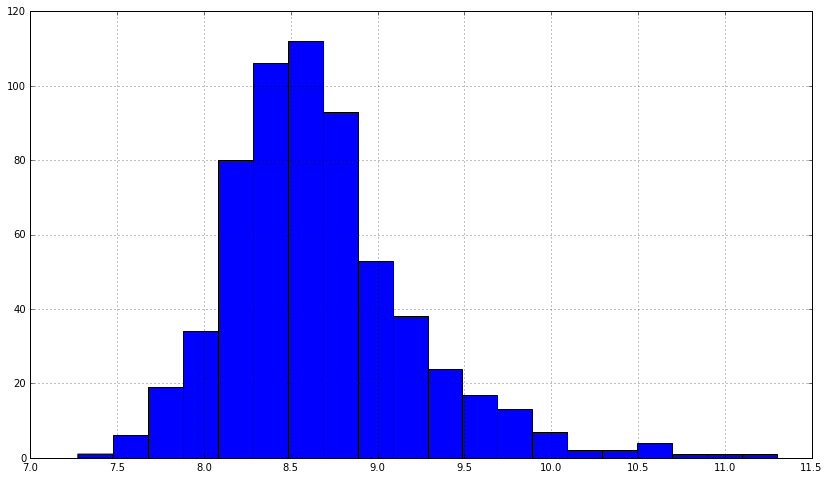

Mean Log(Combined Income):
Male: 8.704 +- 0.528  
Female: 8.477 +- 0.540
-------------------------------------------------------------------------------------


C:\Users\phay\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\phay\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\phay\Anaconda2\lib\site-packages\ipykernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Checking that we filled every missing Gender value:
Gender                 0
Married                0
Education              0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
CombinedIncome         0
CombinedIncome_log     0
dtype: int64


In [11]:
"""
2.5 Gender CONT:
Dealing with the missing values for the gender column.
"""
# Logging our data
data['CombinedIncome_log'] = np.log(data['CombinedIncome'])
temp_mean = data.pivot_table(values = 'CombinedIncome_log', index = 'Gender')
temp_std  = data.pivot_table(values = 'CombinedIncome_log', index = 'Gender', aggfunc = np.std)

print "This was a great idea since our data seems more tamed. This shows the data without the NaN values."
data['CombinedIncome_log'].hist(bins = 20, figsize = (14,8))
plt.show()

print "Mean Log(Combined Income):\nMale: {:1.3f} +- {:1.3f}  \nFemale: {:1.3f} +- {:1.3f}" \
.format(temp_mean[1],temp_std[1],temp_mean[0],temp_std[0])
print "-------------------------------------------------------------------------------------"


#----------------------------------------------------------------------------------------------
"""
This is a loop that takes the NaN values of the dataframe's Gender category and replaces it with a sex corresponding to the
CombinedIncome of the applicant.
""" 
for i,rows in data.loc[data['Gender'].isnull(),:].iterrows():
    # Less than the male minimum = female (AKA LHS)
    if data.loc[i,'CombinedIncome_log'] < (temp_mean[1] - temp_std[1]): 
        data['Gender'][i] = 'Female'
        
    # Greater than the female maximum = male (AKA RHS)
    if data.loc[i,'CombinedIncome_log'] > (temp_mean[0] + temp_std[0]):
        data['Gender'][i] = 'Male'
        
    # Less than the female maximum and greater than the male minimum. (AKA the intersection)
    if (data.loc[i,'CombinedIncome_log'] < temp_mean[0] + temp_std[0]) & \
       (data.loc[i,'CombinedIncome_log'] > temp_mean[1] - temp_std[1]):        
        # 1 for male, 0 for female
        test = np.random.randint(2)
        if test == 1:
            data['Gender'][i] = 'Male'
        else:
            data['Gender'][i] = 'Female'
#----------------------------------------------------------------------------------------------

print "Checking that we filled every missing Gender value:"
print data.apply(lambda x: x.isnull().sum() ,axis = 0)

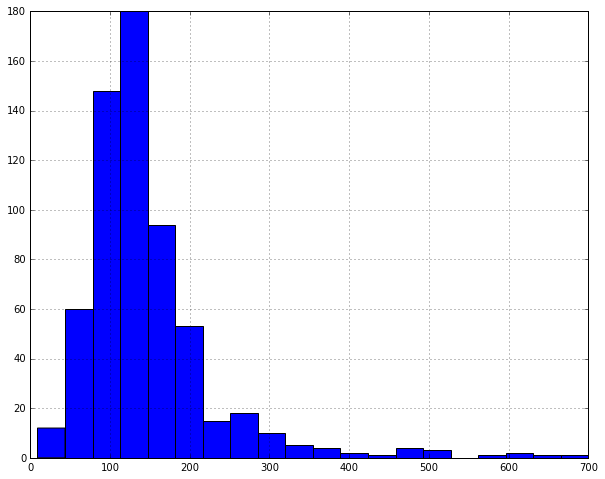

----Seems like the data is extreme again. Lets Log our data again. 



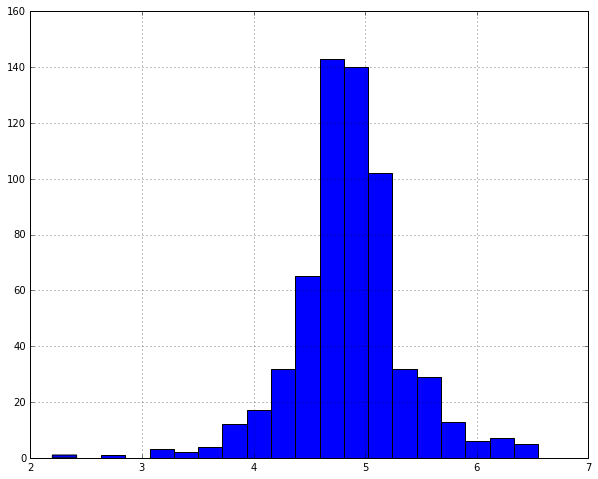

Checking we filled out the LogLoan and LoanAmount values
Gender                 0
Married                0
Education              0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
CombinedIncome         0
CombinedIncome_log     0
LogLoan                0
dtype: int64


In [14]:
"""
3. LoanAmount
"""
data['LoanAmount'].hist(bins = 20, figsize = (10,8))
plt.show()

print "----Seems like the data is extreme again. Lets Log our data again. \n"
# A lot better
data['LogLoan'] = np.log(data['LoanAmount'])
data['LogLoan'].hist(bins = 20, figsize = (10,8))
plt.show()

temp_mean = data.pivot_table(values = 'LogLoan', index = ['Married','Loan_Status','Gender','Property_Area','Education'])

#-----------------------------------------------------------------------------------------------
"""
This for loop replaces all the LogLoan    data that is null.
"""
for i,row in data.loc[(data['LogLoan'].isnull()),:].iterrows():
    ind = tuple([row['Married'],row['Loan_Status'],row['Gender'],row['Property_Area'],row['Education']])
    data['LogLoan'][i] = temp_mean.loc[ind]

"""
This for loop replaces all the LoanAmount data that is null.
"""
for i,row in data.loc[(data['LoanAmount'].isnull()),:].iterrows():
    data['LoanAmount'][i] = np.exp(data['LogLoan'][i])

# ----------------------------------------------------------------------------------------------

print "Checking we filled out the LogLoan and LoanAmount values"
print data.apply(lambda x: x.isnull().sum() ,axis = 0)

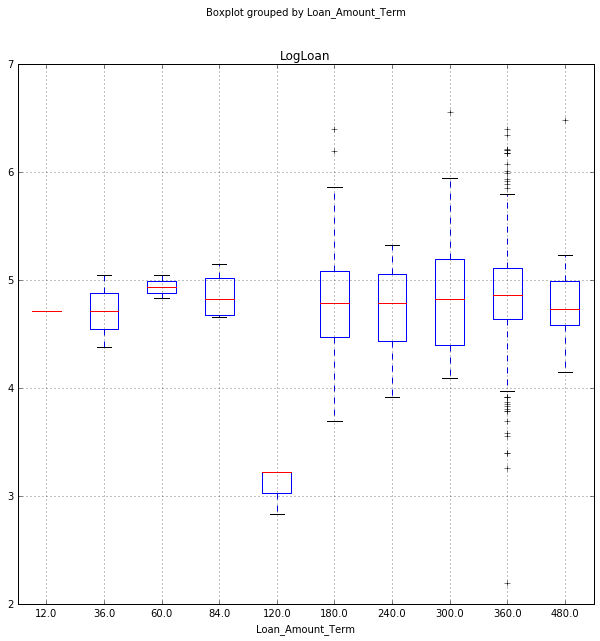

--- By the looks of it, it seems pretty insignificant. Lets replace the rest of the data loan amount terms anyways.

Checking we filled out the LogLoan and LoanAmount values
Gender                 0
Married                0
Education              0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        50
Property_Area          0
Loan_Status            0
CombinedIncome         0
CombinedIncome_log     0
LogLoan                0
dtype: int64


In [17]:
"""
4. Loan_Amount_Term
"""
data.boxplot(column = 'LogLoan', by = 'Loan_Amount_Term', figsize = (10,10))
plt.show()
print "--- By the looks of it, it seems pretty insignificant. Lets replace the rest of the data loan amount terms anyways.\n"

#-----------------------------------------------------------------------------------------------
"""
This for loop replaces all the Loan_Amount_Term data that is null from indexes:
['Married','Gender','Loan_Status','Property_Area','LogLoan']

This also averages the Loan_Amount_Term, then rounds to the nearest possible term type:
[360, 180, 480, 300, 240, 240, 120, 60, 60, 12]

"""
# List of all different Loan_Amount_Terms available
term_types = map(int,list(data['Loan_Amount_Term'].value_counts().index))

# Replacement of null values in Loan_Amount_Term
temp = data.pivot_table(values = "Loan_Amount_Term", 
                        index = ['Married','Gender','Loan_Status','Property_Area','LogLoan','Education'])

for i,row in data.loc[data['Loan_Amount_Term'].isnull(),:].iterrows():
    ind = tuple([row['Married'],row['Gender'],row['Loan_Status'],row['Property_Area'],row['LogLoan'],row['Education']])
    data['Loan_Amount_Term'][i] = min(term_types, key = lambda x: abs(x - temp[ind]))  

#-----------------------------------------------------------------------------------------------
print "Checking we filled out the LogLoan and LoanAmount values"
print data.apply(lambda x: x.isnull().sum() ,axis = 0)

In [18]:
"""
5. Credit_History
"""
temp = data.pivot_table(values = 'Credit_History', \
                        index = ['Married','Gender','Loan_Status','Property_Area','LogLoan','Education'])

for i,row in data.loc[data['Credit_History'].isnull(),:].iterrows():
    ind = tuple([row['Married'],row['Gender'],row['Loan_Status'],row['Property_Area'],row['LogLoan'],row['Education']])
    data['Credit_History'][i] = min([1,0], key = lambda x: abs(x - temp[ind]))  

print data.apply(lambda x: x.isnull().sum() ,axis = 0)

C:\Users\phay\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Gender                0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
CombinedIncome        0
CombinedIncome_log    0
LogLoan               0
dtype: int64


# 2) Data Collection/Cleaning/Munging Finished

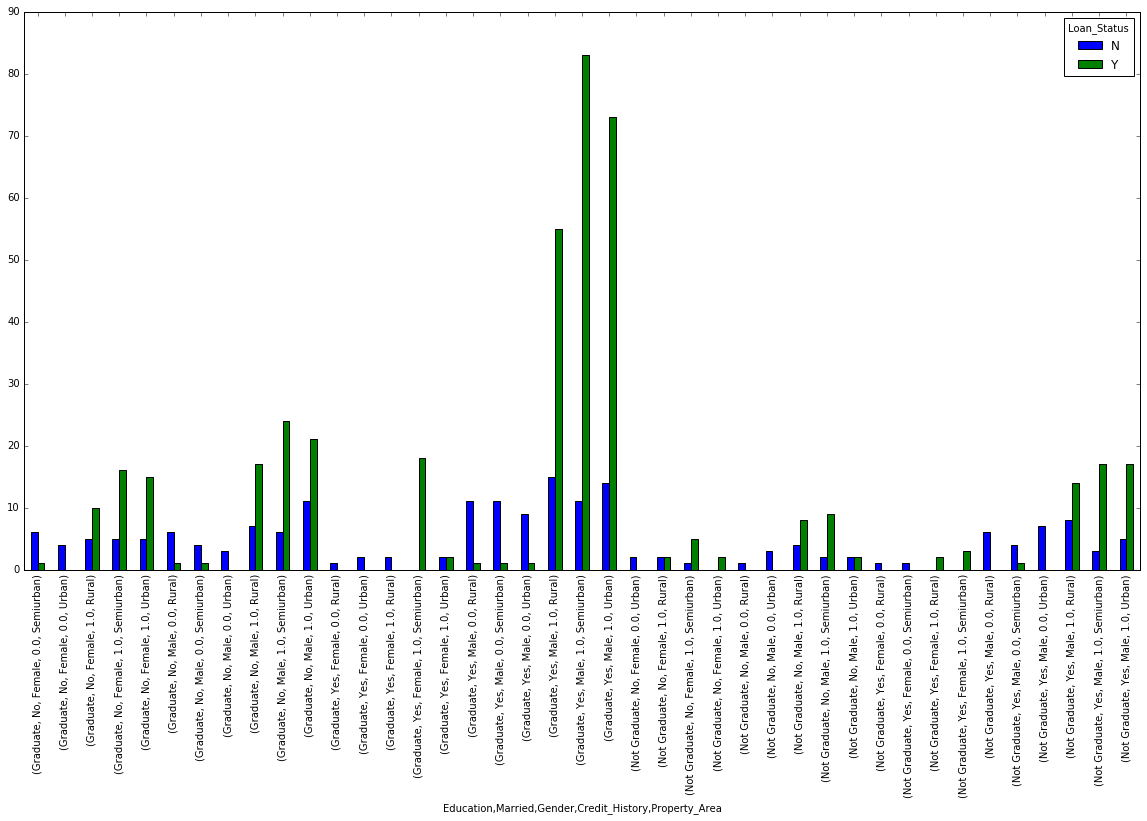

Graduate, Male, Married, Has a Credit History, and lives in a Suburban place seems to peak with little amount N for loan status. The ratio between Y and N for those values are higher than the rest of the table and so its the most likely. I would show the ratio, but some values are 0. That would make the ratio undefined.


In [20]:
"""
Here's a visual as to what seems to be a good chance at a loan.
"""

fig, axis1 = plt.subplots(figsize = (15,5))
temp_plot = pd.crosstab([data['Education'],data['Married'],data['Gender'],data['Credit_History'],data['Property_Area']], \
                         data['Loan_Status'])
temp_plot.plot(kind = 'bar', ax = axis1, figsize = (20,10))
plt.show()

print "Graduate, Male, Married, Has a Credit History, and lives in a Suburban place seems to peak with little amount N for \
loan status. The ratio between Y and N for those values are higher than the rest of the table and so its the most likely. \
I would show the ratio, but some values are 0. That would make the ratio undefined."

# 3) Preprocessing

In [21]:
# Preprocess the data to be represented in numeric (for correlation and machine learning)
from sklearn.preprocessing import LabelEncoder

"""
Married:
0 - No
1 - Yes

Gender:
0 - Female
1 - Male

Education:
0 - Graduate
1 - Not Graduate

Loan_Status:
0 - N
1 - Y

Property_Area:
0 - Rural
1 - Semiurban
2 - Urban

"""

var_list = ['Married','Gender','Loan_Status','Property_Area','Education']
LE = LabelEncoder()

for var in var_list:
    data[var] = LE.fit_transform(data[var])
    

In [22]:
#compute correlations (obviously credit_history has the highest.)
data2 = data.drop(['ApplicantIncome','LoanAmount','CoapplicantIncome','CombinedIncome','CombinedIncome_log','LogLoan'],axis = 1)
data2.corr()['Loan_Status']

Gender              0.027366
Married             0.091478
Education          -0.085884
Loan_Amount_Term   -0.022549
Credit_History      0.540556
Property_Area       0.032112
Loan_Status         1.000000
Name: Loan_Status, dtype: float64

 # 4) Using Machine Learning Techniques for Predictive Model

In [23]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import metrics

In [24]:
def classifying_model(model,data,predictors,outcome):
    # Fitting model
    model.fit(data[predictors],data[outcome])
    # Make predictions on the training set we have
    predictions = model.predict(data[predictors])
    # Want to know accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print "Accuracy: %s" % "{0:.3f}".format(accuracy)
    
    
    kf = KFold(data.shape[0], n_folds = 5)
    error = []
    for train,test in kf:
        # Filtering training set
        train_predictors = (data[predictors].iloc[train,:])
        # The target we're using to train the algorithm
        train_target = data[outcome].iloc[train]
        # Training the algorithm using the predictors and target
        model.fit(train_predictors, train_target)
        # Record Errors
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    
    print "Cross-Validation Score: %s" % "{0:.3f}".format(np.mean(error))
    # Fit it again so we can refer it outside the function
    model.fit(data[predictors],data[outcome])

In [25]:
"""
Logistic Regression
""" 
#-------------------------------------------------------------------------------------
# We want to know if a person would be approved/rejected for a loan based on credit history
outcome_var = 'Loan_Status'
# The model we want to use
model = LogisticRegression()
# The variable we want to predict with
predictor_var = ['Credit_History']

print "Credit_History:"
classifying_model(model,data,predictor_var,outcome_var)

#-------------------------------------------------------------------------------------
# We want to know if a person would be approved/rejected for a loan based on Gender
predictor_var = ['Gender']

print "\nGender:"
classifying_model(model,data,predictor_var,outcome_var)
#------------------------------------------------------
# We want to know if a person would be approved/rejected for a loan based on Education
predictor_var = ['Education']

print "\nEducation:"
classifying_model(model,data,predictor_var,outcome_var)
#------------------------------------------------------
# We want to know if a person would be approved/rejected for a loan based on Property Area
predictor_var = ['Property_Area']

print "\nProperty Area:"
classifying_model(model,data,predictor_var,outcome_var)
#------------------------------------------------------
#Putting together several predictor variables
predictor_var = ['Property_Area','Education','Gender']
print "\nProperty Area, Education, Gender:"
classifying_model(model,data,predictor_var,outcome_var)

predictor_var = ['Property_Area','Education','Gender','Credit_History']
print "\nProperty Area, Education, Gender, Credit History:"
classifying_model(model,data,predictor_var,outcome_var)

#-------------------------------------------------------------------------------------

print "\n\n--- You expect the more data we feed the higher the accuracy. However, it isn't affected by less important \
variables like Property Area, Education, Gender. \
Credit History seems to be the biggest determining factor."

Credit_History:
Accuracy: 0.809
Cross-Validation Score: 0.809

Gender:
Accuracy: 0.687
Cross-Validation Score: 0.687

Education:
Accuracy: 0.687
Cross-Validation Score: 0.687

Property Area:
Accuracy: 0.687
Cross-Validation Score: 0.687

Property Area, Education, Gender:
Accuracy: 0.687
Cross-Validation Score: 0.687

Property Area, Education, Gender, Credit History:
Accuracy: 0.809
Cross-Validation Score: 0.809


--- You expect the more data we feed the higher the accuracy. However, it isn't affected by less important variables like Property Area, Education, Gender. Credit History seems to be the biggest determining factor.


In [31]:
"""
Decision Tree
"""
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
#-------------------------------------------------------------------------------------
# Should give us a similar result to logistic regression
predictor_var = ['Credit_History']
classifying_model(model,data,predictor_var,outcome_var)

print "\nCredit History, LogLoan"
predictor_var = ['Credit_History','LogLoan']
classifying_model(model,data,predictor_var,outcome_var)

print "\nCredit History, LogLoan, Loan Amount Term"
predictor_var = ['Credit_History','Loan_Amount_Term','LogLoan']
classifying_model(model,data,predictor_var,outcome_var)

print "\nCredit History, LogLoan, Loan Amount Term, Married, Gender, Education"
predictor_var = ['Credit_History','Married','Gender','LogLoan','Education','Loan_Amount_Term']
classifying_model(model,data,predictor_var,outcome_var)

print "\n---As expected the accuracy went up as we added more predictor variables, but Cross-Validation Score went down. \
This is usually due to the model overfitting the data. \
This is better than Logistic though."

Accuracy: 0.809
Cross-Validation Score: 0.809

Credit History, LogLoan
Accuracy: 0.881
Cross-Validation Score: 0.700

Credit History, LogLoan, Loan Amount Term
Accuracy: 0.902
Cross-Validation Score: 0.692

Credit History, LogLoan, Loan Amount Term, Married, Gender, Education
Accuracy: 0.961
Cross-Validation Score: 0.694

---As expected the accuracy went up as we added more predictor variables, but Cross-Validation Score went down. This is usually due to the model overfitting the data. This is better than Logistic though.


In [32]:
"""
Random Forest
"""
outcome_var = 'Loan_Status'
model = RandomForestClassifier(n_estimators = 100)
#-------------------------------------------------------------------------------------
# Should give us a similar result to logistic regression
predictor_var = ['Credit_History']
classifying_model(model,data,predictor_var,outcome_var)

print "\nCredit History, LogLoan"
predictor_var = ['Credit_History','LogLoan']
classifying_model(model,data,predictor_var,outcome_var)

print "\nCredit History, LogLoan, Loan Amount Term"
predictor_var = ['Credit_History','Loan_Amount_Term','LogLoan']
classifying_model(model,data,predictor_var,outcome_var)

print "\nCredit History, LogLoan, Loan Amount Term, Married, Gender, Education"
predictor_var = ['Credit_History','Married','Gender','LogLoan','Education','Loan_Amount_Term','CombinedIncome_log']
classifying_model(model,data,predictor_var,outcome_var)

print "\n---We reaches 100% accuracy but similarly, we overfitted the data. Lets select the more important variables to use."

Accuracy: 0.809
Cross-Validation Score: 0.809

Credit History, LogLoan
Accuracy: 0.881
Cross-Validation Score: 0.731

Credit History, LogLoan, Loan Amount Term
Accuracy: 0.902
Cross-Validation Score: 0.733

Credit History, LogLoan, Loan Amount Term, Married, Gender, Education
Accuracy: 1.000
Cross-Validation Score: 0.769

---We reaches 100% accuracy but similarly, we overfitted the data. Lets select the more important variables to use.


In [33]:
"""
Random Forest CONT
"""
important_vars = pd.Series(model.feature_importances_, index = predictor_var).sort_values()
print important_vars

print "\nLets take the first 3 best ones: Credit History, CombinedIncome_log, LogLoan"
predictor_var = ['Credit_History','CombinedIncome_log','LogLoan']
classifying_model(model,data,predictor_var,outcome_var)

print "\nChange Random Forest Parameters to get a better Cross-Validation score"
model = RandomForestClassifier(n_estimators = 25, min_samples_split = 25, max_depth = 7, max_features = 1)
predictor_var = ['Credit_History','CombinedIncome_log','LogLoan']
classifying_model(model,data,predictor_var,outcome_var)

Gender                0.017408
Education             0.018592
Married               0.022160
Loan_Amount_Term      0.048060
Credit_History        0.271317
LogLoan               0.292588
CombinedIncome_log    0.329874
dtype: float64

Lets take the first 3 best ones: Credit History, CombinedIncome_log, LogLoan
Accuracy: 1.000
Cross-Validation Score: 0.779

Change Random Forest Parameters to get a better Cross-Validation score
Accuracy: 0.822
Cross-Validation Score: 0.801


# 5) Conclusion:
Notice: Cross-Validation score went up and so our model is definitely more general with those parameters. 
You can always feature engineer to better suit the model as well.

As we saw from the chart after we finished data cleaning... here are the best categories:
- Married
- Graduate
- Male (or Female because there shouldn't be a real difference)
- Having a Credit History
- Then practically any living place.

However, we also notice that credit history played a big role in the rest of the loan approvals. This agreed with our model prediction. 